<a href="https://colab.research.google.com/github/BenUCL/Reef-acoustics-and-AI/blob/main/Code/UMAP_Poly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **UMAP plot full datasets**
This script contains code blocks which import the csv files of features and create UMAP embeddings and plots with these. Blocks for each method and task is are indicated in bold headers.



In [ ]:
# Connect Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!pip uninstall umap
!pip install umap-learn
!pip install umap-learn[plot]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 3.5 MB/s 
     |████████████████████████████████| 1.1 MB 49.9 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=65084bea029c09ddddb3ff4ddf7819cc458e888f0b4c6465dc50825d392ea683
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.7-py3-none-any.whl size=54286 sha256=871cc01f2164f4bec82d45a92b1773e19c40664d0a5299ce96808f34c4f054ef
  Stored in directory: /root/.cache/pip/wheels/7f/2a/f8/7bd5dcec71bd5c669f6f574db3113513696b98f3f9b51f496c
Successfully built umap-learn pynndescent
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 18.2 MB 743 kB/s 
     |████████████████████████████████| 76 kB 4.6 MB/s 


In [ ]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import umap.umap_ as umap
import umap.plot
#from umap import plot
%matplotlib inline

import random

random.seed(123)

# Ecoacoustic Indices

In [ ]:
# Uppload the csv of features and copy the path
indices_path = r'/content/drive/MyDrive/Reef soundscapes with AI/Results/full_dataset_features/compound_index_poly.csv'

data = pd.read_csv (indices_path) #load dataframe
indices_df = data.reset_index() #put index in order
indices_df = indices_df.iloc[: , 2:] #remove unnecessary index


indices_df

,minute,fish_ACI,fish_ACI_std,fish_ADI,fish_ADI_std,fish_H,fish_H_std,fish_Hf,fish_Hf_std,fish_M,...,full_H,full_H_std,full_Hf,full_Hf_std,full_M,full_M_std,full_BI,full_BI_std,NDSI,NDSI_std
0,SiteCDay3.805322778.210303214058.wav,174.218205,17.129130,1.875490,0.173853,0.999264,0.000535,0.378237,0.043518,0.000395,...,0.999935,0.000040,0.723675,0.032540,0.001088,0.000096,3.503309,0.543755,0.409907,0.203473
1,SiteXDay3.5210.210215103530.wav,157.968812,10.113108,1.060467,0.725850,0.998440,0.000723,0.274085,0.024864,0.000346,...,0.999478,0.000483,0.418846,0.072226,0.000478,0.000077,2.933921,0.506337,-0.594888,0.182238
2,SiteYDay2.5210.210302223537.wav,167.240630,12.467357,2.092218,0.144701,0.999330,0.000496,0.402144,0.032731,0.000107,...,0.999927,0.000035,0.752729,0.014195,0.000225,0.000013,2.624677,0.405407,0.460494,0.091826
3,SiteDDay2.5210.210317091056.wav,167.300849,14.807595,2.132824,0.137796,0.999494,0.000356,0.437447,0.042290,0.000335,...,0.999893,0.000066,0.753096,0.021810,0.001418,0.000228,3.267791,0.523877,0.594795,0.117539
4,SiteADay3.805322778.210205190014.wav,166.893735,12.189808,2.266322,0.044466,0.999403,0.000294,0.490927,0.020568,0.000896,...,0.999714,0.000160,0.747237,0.009536,0.005664,0.000574,4.519593,0.552794,0.567966,0.058083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8971,SiteDDay3.5210.210317141559.wav,170.071230,12.601021,2.189805,0.068999,0.999407,0.000523,0.445003,0.031544,0.000332,...,0.999917,0.000048,0.755005,0.017686,0.001191,0.000166,3.187252,0.469140,0.587790,0.112436
8972,SiteBDay2.805322778.210214103515.wav,181.853111,20.931387,2.163294,0.100668,0.999683,0.000257,0.475591,0.037743,0.000272,...,0.999906,0.000053,0.748582,0.013001,0.001522,0.000252,3.948331,0.874206,0.544871,0.106626
8973,SiteZDay1.805322778.210315152558.wav,158.145137,27.392857,2.146278,0.276145,0.997020,0.002878,0.380860,0.085879,0.000280,...,0.999357,0.001093,0.627187,0.153737,0.000492,0.000221,2.777938,0.545387,0.003091,0.518179
8974,SiteADay3.805322778.210206002517.wav,170.324712,11.975342,2.229248,0.064849,0.999550,0.000248,0.493432,0.018535,0.000725,...,0.999731,0.000134,0.735358,0.007276,0.005872,0.000512,5.744549,0.701538,0.603230,0.037691


In [ ]:
# Add a column that denotes class
def get_class(filename):
    #find part of the name that corresponds to the deployment
     #adapted the get_identifier function above to only get class (e.g healthy)
    t = filename.split(".")[0][0:5]
    site_name = t[0:4] + ' ' + t[4]
    return site_name

class_type = []
for i in indices_df['minute']:
  class_type.append(get_class(i))

indices_df.insert(1, 'Habitat', class_type)

# Check the class column was added 
indices_df.head()

,minute,Habitat,fish_ACI,fish_ACI_std,fish_ADI,fish_ADI_std,fish_H,fish_H_std,fish_Hf,fish_Hf_std,...,full_H,full_H_std,full_Hf,full_Hf_std,full_M,full_M_std,full_BI,full_BI_std,NDSI,NDSI_std
0,SiteCDay3.805322778.210303214058.wav,Site C,174.218205,17.129130,1.875490,0.173853,0.999264,0.000535,0.378237,0.043518,...,0.999935,0.000040,0.723675,0.032540,0.001088,0.000096,3.503309,0.543755,0.409907,0.203473
1,SiteXDay3.5210.210215103530.wav,Site X,157.968812,10.113108,1.060467,0.725850,0.998440,0.000723,0.274085,0.024864,...,0.999478,0.000483,0.418846,0.072226,0.000478,0.000077,2.933921,0.506337,-0.594888,0.182238
2,SiteYDay2.5210.210302223537.wav,Site Y,167.240630,12.467357,2.092218,0.144701,0.999330,0.000496,0.402144,0.032731,...,0.999927,0.000035,0.752729,0.014195,0.000225,0.000013,2.624677,0.405407,0.460494,0.091826
3,SiteDDay2.5210.210317091056.wav,Site D,167.300849,14.807595,2.132824,0.137796,0.999494,0.000356,0.437447,0.042290,...,0.999893,0.000066,0.753096,0.021810,0.001418,0.000228,3.267791,0.523877,0.594795,0.117539
4,SiteADay3.805322778.210205190014.wav,Site A,166.893735,12.189808,2.266322,0.044466,0.999403,0.000294,0.490927,0.020568,...,0.999714,0.000160,0.747237,0.009536,0.005664,0.000574,4.519593,0.552794,0.567966,0.058083


In [ ]:
# create umap
mapper = umap.UMAP(n_neighbors=50, min_dist=0.5).fit(indices_df.iloc[:,2:40])

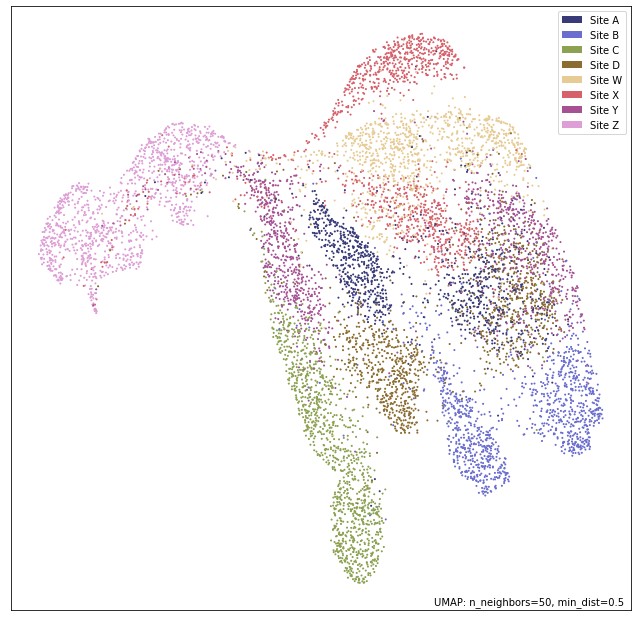

In [ ]:
# plot it
umap.plot.points(mapper, labels=indices_df.Habitat, theme = 'red')

# Pretrained Network 

In [ ]:
# Uppload the csv of features and copy the path
pretrained_path = r'/content/drive/MyDrive/Reef soundscapes with AI/Results/full_dataset_features/pretrained_CNN_poly.csv'

data = pd.read_csv (pretrained_path) #load dataframe
temp_df = data.reset_index() #put index in order
temp_df = temp_df.iloc[: , 2:] #remove unnecessary index
temp_df = temp_df.T #transpose to match indices format
temp_df = temp_df.reset_index() #re-add the index
pretrained_df = temp_df.rename(columns={"index": "minute"})


pretrained_df

,minute,0,1,2,3,4,5,6,7,8,...,118,119,120,121,122,123,124,125,126,127
0,SiteCDay3.805322778.210303214058.wav,0.024271,0.015441,0.673868,0.015810,0.000000,0.0,0.0,0.013191,0.0,...,0.0,0.075812,0.079045,0.000000,0.164519,0.160550,0.027020,0.000000,0.000133,0.001901
1,SiteXDay3.5210.210215103530.wav,0.024545,0.001385,0.885764,0.007736,0.000000,0.0,0.0,0.003682,0.0,...,0.0,0.054833,0.031658,0.000000,0.210327,0.050721,0.043802,0.000000,0.000000,0.000000
2,SiteYDay2.5210.210302223537.wav,0.038698,0.000000,0.621418,0.045740,0.000000,0.0,0.0,0.029869,0.0,...,0.0,0.042964,0.068022,0.000000,0.006417,0.156122,0.001582,0.000000,0.000000,0.000000
3,SiteDDay2.5210.210317091056.wav,0.011494,0.099208,0.532689,0.007028,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.006671,0.003732,0.000000,0.039698,0.226014,0.066506,0.000000,0.001176,0.000000
4,SiteADay3.805322778.210205190014.wav,0.000000,0.084872,0.072530,0.075937,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.023012,0.000000,0.000000,0.237829,0.050223,0.057576,0.000000,0.000000,0.008781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8971,SiteDDay3.5210.210317141559.wav,0.011558,0.052947,0.591418,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.007208,0.003910,0.000000,0.030538,0.202830,0.018578,0.000000,0.000000,0.000000
8972,SiteBDay2.805322778.210214103515.wav,0.001393,0.066229,0.398799,0.149027,0.000000,0.0,0.0,0.000777,0.0,...,0.0,0.053009,0.007668,0.000623,0.001218,0.297432,0.215393,0.000000,0.000000,0.000000
8973,SiteZDay1.805322778.210315152558.wav,0.020564,0.101476,0.334346,0.159136,0.000654,0.0,0.0,0.016787,0.0,...,0.0,0.068794,0.025673,0.000000,0.000000,0.264537,0.285786,0.011261,0.000000,0.000525
8974,SiteADay3.805322778.210206002517.wav,0.000000,0.199585,0.116687,0.252471,0.000000,0.0,0.0,0.000073,0.0,...,0.0,0.000000,0.000000,0.000000,0.028089,0.093403,0.154533,0.000000,0.000076,0.006282


In [ ]:
# Add a column that denotes class
def get_class(filename):
    #find part of the name that corresponds to the deployment
     #adapted the get_identifier function above to only get class (e.g healthy)
    t = filename.split(".")[0][0:5]
    site_name = t[0:4] + ' ' + t[4]
    return site_name

class_type = []
for i in pretrained_df['minute']:
  class_type.append(get_class(i))

pretrained_df.insert(1, 'Habitat', class_type)

# Check the class column was added 
pretrained_df.head()

,minute,Habitat,0,1,2,3,4,5,6,7,...,118,119,120,121,122,123,124,125,126,127
0,SiteCDay3.805322778.210303214058.wav,Site C,0.024271,0.015441,0.673868,0.015810,0.0,0.0,0.0,0.013191,...,0.0,0.075812,0.079045,0.0,0.164519,0.160550,0.027020,0.0,0.000133,0.001901
1,SiteXDay3.5210.210215103530.wav,Site X,0.024545,0.001385,0.885764,0.007736,0.0,0.0,0.0,0.003682,...,0.0,0.054833,0.031658,0.0,0.210327,0.050721,0.043802,0.0,0.000000,0.000000
2,SiteYDay2.5210.210302223537.wav,Site Y,0.038698,0.000000,0.621418,0.045740,0.0,0.0,0.0,0.029869,...,0.0,0.042964,0.068022,0.0,0.006417,0.156122,0.001582,0.0,0.000000,0.000000
3,SiteDDay2.5210.210317091056.wav,Site D,0.011494,0.099208,0.532689,0.007028,0.0,0.0,0.0,0.000000,...,0.0,0.006671,0.003732,0.0,0.039698,0.226014,0.066506,0.0,0.001176,0.000000
4,SiteADay3.805322778.210205190014.wav,Site A,0.000000,0.084872,0.072530,0.075937,0.0,0.0,0.0,0.000000,...,0.0,0.023012,0.000000,0.0,0.237829,0.050223,0.057576,0.0,0.000000,0.008781


In [ ]:
#####create standard plot in viewer 
mapper = umap.UMAP(n_neighbors=50, min_dist=0.5).fit(pretrained_df.iloc[:,2:130])

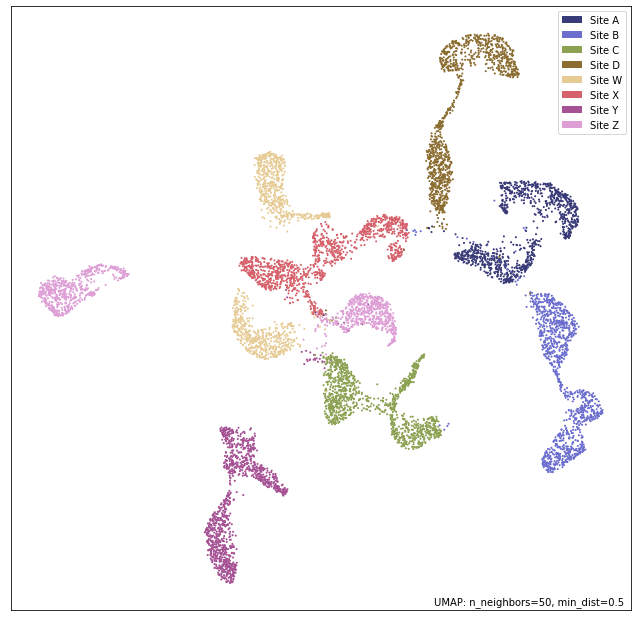

In [ ]:
#uses the 'habitat' column as the label
umap.plot.points(mapper, labels=pretrained_df.Habitat, theme = 'red')

## Fully trained network

In [ ]:

# Uppload the csv of features and copy the path
fullytrained_path = r'/content/drive/MyDrive/Reef soundscapes with AI/Results/full_dataset_features/trained_CNN_poly.csv'

data = pd.read_csv (fullytrained_path) #load dataframe
temp_df = data.reset_index() #put index in order
temp_df = temp_df.iloc[: , 2:] #remove unnecessary index
temp_df = temp_df.T #transpose to match indices format
temp_df = temp_df.reset_index() #re-add the index
fullytrained_df = temp_df.rename(columns={"index": "minute"})


fullytrained_df

,minute,0,1,2,3,4,5,6,7,8,...,118,119,120,121,122,123,124,125,126,127
0,SiteCDay3.805322778.210303214058.wav,0.000000,0.000000,12.082821,6.763444,7.179127,0.0,13.351444,20.285992,0.033560,...,0.0,0.051185,16.882797,0.000000,11.385775,4.218807,0.278274,0.0,0.031203,0.0
1,SiteXDay3.5210.210215103530.wav,0.247064,0.859065,0.172915,0.105359,4.611157,0.0,0.000000,1.952035,15.173376,...,0.0,28.823147,17.230404,0.000000,28.133654,0.948916,6.289915,0.0,0.000000,0.0
2,SiteYDay2.5210.210302223537.wav,8.517760,0.000000,8.564845,6.759220,0.000000,0.0,0.000000,5.992061,0.553392,...,0.0,14.142094,10.024358,0.000000,0.887872,2.432700,0.000000,0.0,0.000000,0.0
3,SiteDDay2.5210.210317091056.wav,0.000000,0.642867,10.952372,1.292887,13.916732,0.0,2.824940,0.004537,0.204889,...,0.0,0.000000,11.003201,15.533544,10.891987,19.481220,0.070055,0.0,0.000000,0.0
4,SiteADay3.805322778.210205190014.wav,0.000000,7.664385,0.153724,5.604998,0.009447,0.0,9.419145,0.000000,0.000000,...,0.0,0.000000,0.625055,11.007442,1.294202,7.215663,2.364219,0.0,9.198437,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8971,SiteDDay3.5210.210317141559.wav,0.000000,0.836633,9.874312,1.468140,13.111176,0.0,3.074124,0.055296,0.434827,...,0.0,0.000000,10.769614,14.327220,11.190660,17.939144,0.031064,0.0,0.000000,0.0
8972,SiteBDay2.805322778.210214103515.wav,0.000000,0.029791,0.472249,2.373129,0.847475,0.0,15.462376,10.305596,7.931785,...,0.0,0.000000,4.572477,2.165407,3.922737,9.982875,10.227706,0.0,22.232014,0.0
8973,SiteZDay1.805322778.210315152558.wav,0.161475,0.000000,9.621263,9.412618,0.041480,0.0,1.435342,5.899443,4.194800,...,0.0,0.000000,0.609104,3.333061,0.257742,9.473574,9.546450,0.0,0.000000,0.0
8974,SiteADay3.805322778.210206002517.wav,0.000000,7.400408,0.352242,5.591997,0.000000,0.0,9.455390,0.000000,0.000000,...,0.0,0.000000,0.122060,8.509346,0.041546,7.780166,3.381505,0.0,9.965737,0.0


In [ ]:
# Add a column that denotes class
def get_class(filename):
    #find part of the name that corresponds to the deployment
     #adapted the get_identifier function above to only get class (e.g healthy)
    t = filename.split(".")[0][0:5]
    site_name = t[0:4] + ' ' + t[4]
    return site_name

class_type = []
for i in fullytrained_df['minute']:
  class_type.append(get_class(i))

fullytrained_df.insert(1, 'Habitat', class_type)

# Check the class column was added 
fullytrained_df.head()

,minute,Habitat,0,1,2,3,4,5,6,7,...,118,119,120,121,122,123,124,125,126,127
0,SiteCDay3.805322778.210303214058.wav,Site C,0.000000,0.000000,12.082821,6.763444,7.179127,0.0,13.351444,20.285992,...,0.0,0.051185,16.882797,0.000000,11.385775,4.218807,0.278274,0.0,0.031203,0.0
1,SiteXDay3.5210.210215103530.wav,Site X,0.247064,0.859065,0.172915,0.105359,4.611157,0.0,0.000000,1.952035,...,0.0,28.823147,17.230404,0.000000,28.133654,0.948916,6.289915,0.0,0.000000,0.0
2,SiteYDay2.5210.210302223537.wav,Site Y,8.517760,0.000000,8.564845,6.759220,0.000000,0.0,0.000000,5.992061,...,0.0,14.142094,10.024358,0.000000,0.887872,2.432700,0.000000,0.0,0.000000,0.0
3,SiteDDay2.5210.210317091056.wav,Site D,0.000000,0.642867,10.952372,1.292887,13.916732,0.0,2.824940,0.004537,...,0.0,0.000000,11.003201,15.533544,10.891987,19.481220,0.070055,0.0,0.000000,0.0
4,SiteADay3.805322778.210205190014.wav,Site A,0.000000,7.664385,0.153724,5.604998,0.009447,0.0,9.419145,0.000000,...,0.0,0.000000,0.625055,11.007442,1.294202,7.215663,2.364219,0.0,9.198437,0.0


In [ ]:
#####create standard plot in viewer 
mapper = umap.UMAP(n_neighbors=50, min_dist=0.5).fit(fullytrained_df.iloc[:,2:130])

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  "Graph is not fully connected, spectral embedding may not work as expected."


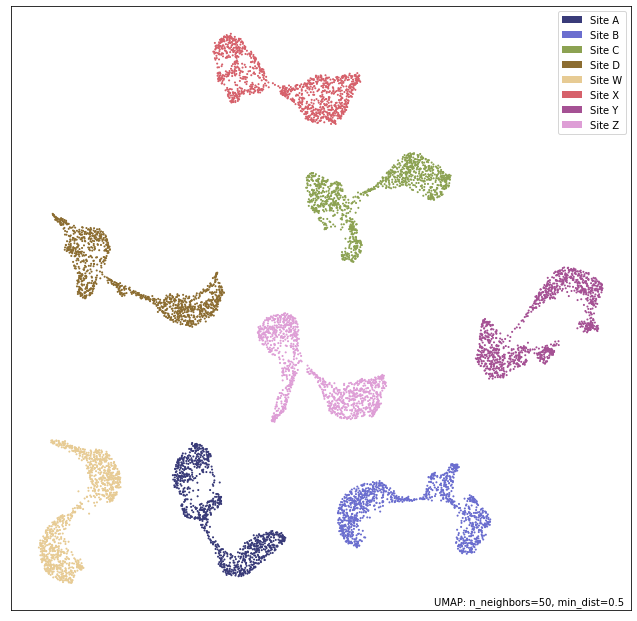

In [ ]:
#uses the 'habitat' column as the label
umap.plot.points(mapper, labels=fullytrained_df.Habitat, theme = 'red')

# **Indices split by habitat**

In [ ]:
# Uppload the csv of features and copy the path
indices_path = r'/content/drive/MyDrive/Reef soundscapes with AI/Results/full_dataset_features/compound_index_poly.csv'

data = pd.read_csv (indices_path) #load dataframe
indices_df = data.reset_index() #put index in order
indices_df = indices_df.iloc[: , 2:] #remove unnecessary index

# remomve unwanted classes from DF
indices_df

,minute,fish_ACI,fish_ACI_std,fish_ADI,fish_ADI_std,fish_H,fish_H_std,fish_Hf,fish_Hf_std,fish_M,...,full_H,full_H_std,full_Hf,full_Hf_std,full_M,full_M_std,full_BI,full_BI_std,NDSI,NDSI_std
0,SiteCDay3.805322778.210303214058.wav,174.218205,17.129130,1.875490,0.173853,0.999264,0.000535,0.378237,0.043518,0.000395,...,0.999935,0.000040,0.723675,0.032540,0.001088,0.000096,3.503309,0.543755,0.409907,0.203473
1,SiteXDay3.5210.210215103530.wav,157.968812,10.113108,1.060467,0.725850,0.998440,0.000723,0.274085,0.024864,0.000346,...,0.999478,0.000483,0.418846,0.072226,0.000478,0.000077,2.933921,0.506337,-0.594888,0.182238
2,SiteYDay2.5210.210302223537.wav,167.240630,12.467357,2.092218,0.144701,0.999330,0.000496,0.402144,0.032731,0.000107,...,0.999927,0.000035,0.752729,0.014195,0.000225,0.000013,2.624677,0.405407,0.460494,0.091826
3,SiteDDay2.5210.210317091056.wav,167.300849,14.807595,2.132824,0.137796,0.999494,0.000356,0.437447,0.042290,0.000335,...,0.999893,0.000066,0.753096,0.021810,0.001418,0.000228,3.267791,0.523877,0.594795,0.117539
4,SiteADay3.805322778.210205190014.wav,166.893735,12.189808,2.266322,0.044466,0.999403,0.000294,0.490927,0.020568,0.000896,...,0.999714,0.000160,0.747237,0.009536,0.005664,0.000574,4.519593,0.552794,0.567966,0.058083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8971,SiteDDay3.5210.210317141559.wav,170.071230,12.601021,2.189805,0.068999,0.999407,0.000523,0.445003,0.031544,0.000332,...,0.999917,0.000048,0.755005,0.017686,0.001191,0.000166,3.187252,0.469140,0.587790,0.112436
8972,SiteBDay2.805322778.210214103515.wav,181.853111,20.931387,2.163294,0.100668,0.999683,0.000257,0.475591,0.037743,0.000272,...,0.999906,0.000053,0.748582,0.013001,0.001522,0.000252,3.948331,0.874206,0.544871,0.106626
8973,SiteZDay1.805322778.210315152558.wav,158.145137,27.392857,2.146278,0.276145,0.997020,0.002878,0.380860,0.085879,0.000280,...,0.999357,0.001093,0.627187,0.153737,0.000492,0.000221,2.777938,0.545387,0.003091,0.518179
8974,SiteADay3.805322778.210206002517.wav,170.324712,11.975342,2.229248,0.064849,0.999550,0.000248,0.493432,0.018535,0.000725,...,0.999731,0.000134,0.735358,0.007276,0.005872,0.000512,5.744549,0.701538,0.603230,0.037691


In [ ]:
# Add a column that denotes class
def get_class(filename):
    #find part of the name that corresponds to the deployment
     #adapted the get_identifier function above to only get class (e.g healthy)
    t = filename.split(".")[0][0:5]
    return t

class_type = []
for i in indices_df['minute']:
  class_type.append(get_class(i))
  
  
 # if get_class(i) == 'D':
  #  class_type.append('Degraded')
  #if get_class(i) == 'H':
   # class_type.append('Healthy')

indices_df.insert(1, 'Habitat', class_type)

# Check the class column was added 
indices_df.head()

,minute,Habitat,fish_ACI,fish_ACI_std,fish_ADI,fish_ADI_std,fish_H,fish_H_std,fish_Hf,fish_Hf_std,...,full_H,full_H_std,full_Hf,full_Hf_std,full_M,full_M_std,full_BI,full_BI_std,NDSI,NDSI_std
0,SiteCDay3.805322778.210303214058.wav,SiteC,174.218205,17.129130,1.875490,0.173853,0.999264,0.000535,0.378237,0.043518,...,0.999935,0.000040,0.723675,0.032540,0.001088,0.000096,3.503309,0.543755,0.409907,0.203473
1,SiteXDay3.5210.210215103530.wav,SiteX,157.968812,10.113108,1.060467,0.725850,0.998440,0.000723,0.274085,0.024864,...,0.999478,0.000483,0.418846,0.072226,0.000478,0.000077,2.933921,0.506337,-0.594888,0.182238
2,SiteYDay2.5210.210302223537.wav,SiteY,167.240630,12.467357,2.092218,0.144701,0.999330,0.000496,0.402144,0.032731,...,0.999927,0.000035,0.752729,0.014195,0.000225,0.000013,2.624677,0.405407,0.460494,0.091826
3,SiteDDay2.5210.210317091056.wav,SiteD,167.300849,14.807595,2.132824,0.137796,0.999494,0.000356,0.437447,0.042290,...,0.999893,0.000066,0.753096,0.021810,0.001418,0.000228,3.267791,0.523877,0.594795,0.117539
4,SiteADay3.805322778.210205190014.wav,SiteA,166.893735,12.189808,2.266322,0.044466,0.999403,0.000294,0.490927,0.020568,...,0.999714,0.000160,0.747237,0.009536,0.005664,0.000574,4.519593,0.552794,0.567966,0.058083


In [ ]:
# Rename the renaming sites to High or Low fish
indices_df['Habitat'] = indices_df['Habitat'].replace(['SiteA'],'Photic')
indices_df['Habitat'] = indices_df['Habitat'].replace(['SiteB'],'Photic')
indices_df['Habitat'] = indices_df['Habitat'].replace(['SiteC'],'Photic')
indices_df['Habitat'] = indices_df['Habitat'].replace(['SiteD'],'Photic')

indices_df['Habitat'] = indices_df['Habitat'].replace(['SiteW'],'Mesophotic')
indices_df['Habitat'] = indices_df['Habitat'].replace(['SiteX'],'Mesophotic')
indices_df['Habitat'] = indices_df['Habitat'].replace(['SiteY'],'Mesophotic')
indices_df['Habitat'] = indices_df['Habitat'].replace(['SiteZ'],'Mesophotic')

indices_df.head()

,minute,Habitat,fish_ACI,fish_ACI_std,fish_ADI,fish_ADI_std,fish_H,fish_H_std,fish_Hf,fish_Hf_std,...,full_H,full_H_std,full_Hf,full_Hf_std,full_M,full_M_std,full_BI,full_BI_std,NDSI,NDSI_std
0,SiteCDay3.805322778.210303214058.wav,Photic,174.218205,17.129130,1.875490,0.173853,0.999264,0.000535,0.378237,0.043518,...,0.999935,0.000040,0.723675,0.032540,0.001088,0.000096,3.503309,0.543755,0.409907,0.203473
1,SiteXDay3.5210.210215103530.wav,Mesophotic,157.968812,10.113108,1.060467,0.725850,0.998440,0.000723,0.274085,0.024864,...,0.999478,0.000483,0.418846,0.072226,0.000478,0.000077,2.933921,0.506337,-0.594888,0.182238
2,SiteYDay2.5210.210302223537.wav,Mesophotic,167.240630,12.467357,2.092218,0.144701,0.999330,0.000496,0.402144,0.032731,...,0.999927,0.000035,0.752729,0.014195,0.000225,0.000013,2.624677,0.405407,0.460494,0.091826
3,SiteDDay2.5210.210317091056.wav,Photic,167.300849,14.807595,2.132824,0.137796,0.999494,0.000356,0.437447,0.042290,...,0.999893,0.000066,0.753096,0.021810,0.001418,0.000228,3.267791,0.523877,0.594795,0.117539
4,SiteADay3.805322778.210205190014.wav,Photic,166.893735,12.189808,2.266322,0.044466,0.999403,0.000294,0.490927,0.020568,...,0.999714,0.000160,0.747237,0.009536,0.005664,0.000574,4.519593,0.552794,0.567966,0.058083


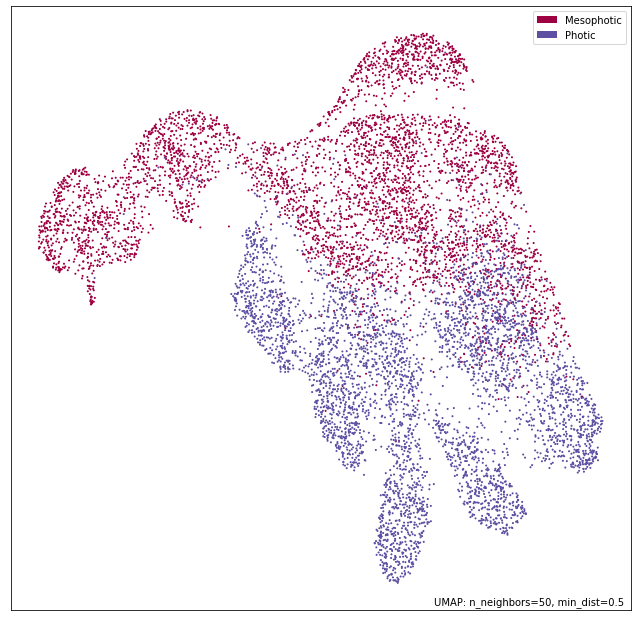

In [ ]:
#####create standard plot in viewer 
mapper = umap.UMAP(n_neighbors=50, min_dist=0.5).fit(indices_df.iloc[:,2:40])

#uses the 'habitat' column as the label
umap.plot.points(mapper, labels=indices_df.Habitat)#, theme = 'fire')

# **Pretrained split by habitat**

In [ ]:
# Uppload the csv of features and copy the path
pretrained_path = r'/content/drive/MyDrive/Reef soundscapes with AI/Results/full_dataset_features/pretrained_CNN_poly.csv'

data = pd.read_csv (pretrained_path) #load dataframe
temp_df = data.reset_index() #put index in order
temp_df = temp_df.iloc[: , 2:] #remove unnecessary index
temp_df = temp_df.T #transpose to match indices format
temp_df = temp_df.reset_index() #re-add the index
pretrained_df = temp_df.rename(columns={"index": "minute"})
#pretrained_df

In [ ]:
# Add a column that denotes class
def get_class(filename):
    #find part of the name that corresponds to the deployment
     #adapted the get_identifier function above to only get class (e.g healthy)
    t = filename.split(".")[0][0:5]
    return t

class_type = []
for i in pretrained_df['minute']:
  class_type.append(get_class(i))
  
  
 # if get_class(i) == 'D':
  #  class_type.append('Degraded')
  #if get_class(i) == 'H':
   # class_type.append('Healthy')

pretrained_df.insert(1, 'Habitat', class_type)

# Check the class column was added 
pretrained_df.head()


#pretrained_df.head()


,minute,Habitat,0,1,2,3,4,5,6,7,...,118,119,120,121,122,123,124,125,126,127
0,SiteCDay3.805322778.210303214058.wav,SiteC,0.024271,0.015441,0.673868,0.015810,0.0,0.0,0.0,0.013191,...,0.0,0.075812,0.079045,0.0,0.164519,0.160550,0.027020,0.0,0.000133,0.001901
1,SiteXDay3.5210.210215103530.wav,SiteX,0.024545,0.001385,0.885764,0.007736,0.0,0.0,0.0,0.003682,...,0.0,0.054833,0.031658,0.0,0.210327,0.050721,0.043802,0.0,0.000000,0.000000
2,SiteYDay2.5210.210302223537.wav,SiteY,0.038698,0.000000,0.621418,0.045740,0.0,0.0,0.0,0.029869,...,0.0,0.042964,0.068022,0.0,0.006417,0.156122,0.001582,0.0,0.000000,0.000000
3,SiteDDay2.5210.210317091056.wav,SiteD,0.011494,0.099208,0.532689,0.007028,0.0,0.0,0.0,0.000000,...,0.0,0.006671,0.003732,0.0,0.039698,0.226014,0.066506,0.0,0.001176,0.000000
4,SiteADay3.805322778.210205190014.wav,SiteA,0.000000,0.084872,0.072530,0.075937,0.0,0.0,0.0,0.000000,...,0.0,0.023012,0.000000,0.0,0.237829,0.050223,0.057576,0.0,0.000000,0.008781


In [ ]:
# Rename the renaming sites to High or Low fish
pretrained_df['Habitat'] = pretrained_df['Habitat'].replace(['SiteA'],'Photic')
pretrained_df['Habitat'] = pretrained_df['Habitat'].replace(['SiteB'],'Photic')
pretrained_df['Habitat'] = pretrained_df['Habitat'].replace(['SiteC'],'Photic')
pretrained_df['Habitat'] = pretrained_df['Habitat'].replace(['SiteD'],'Photic')

pretrained_df['Habitat'] = pretrained_df['Habitat'].replace(['SiteW'],'Mesophotic')
pretrained_df['Habitat'] = pretrained_df['Habitat'].replace(['SiteX'],'Mesophotic')
pretrained_df['Habitat'] = pretrained_df['Habitat'].replace(['SiteY'],'Mesophotic')
pretrained_df['Habitat'] = pretrained_df['Habitat'].replace(['SiteZ'],'Mesophotic')

pretrained_df.head()

,minute,Habitat,0,1,2,3,4,5,6,7,...,118,119,120,121,122,123,124,125,126,127
0,SiteCDay3.805322778.210303214058.wav,Photic,0.024271,0.015441,0.673868,0.015810,0.0,0.0,0.0,0.013191,...,0.0,0.075812,0.079045,0.0,0.164519,0.160550,0.027020,0.0,0.000133,0.001901
1,SiteXDay3.5210.210215103530.wav,Mesophotic,0.024545,0.001385,0.885764,0.007736,0.0,0.0,0.0,0.003682,...,0.0,0.054833,0.031658,0.0,0.210327,0.050721,0.043802,0.0,0.000000,0.000000
2,SiteYDay2.5210.210302223537.wav,Mesophotic,0.038698,0.000000,0.621418,0.045740,0.0,0.0,0.0,0.029869,...,0.0,0.042964,0.068022,0.0,0.006417,0.156122,0.001582,0.0,0.000000,0.000000
3,SiteDDay2.5210.210317091056.wav,Photic,0.011494,0.099208,0.532689,0.007028,0.0,0.0,0.0,0.000000,...,0.0,0.006671,0.003732,0.0,0.039698,0.226014,0.066506,0.0,0.001176,0.000000
4,SiteADay3.805322778.210205190014.wav,Photic,0.000000,0.084872,0.072530,0.075937,0.0,0.0,0.0,0.000000,...,0.0,0.023012,0.000000,0.0,0.237829,0.050223,0.057576,0.0,0.000000,0.008781


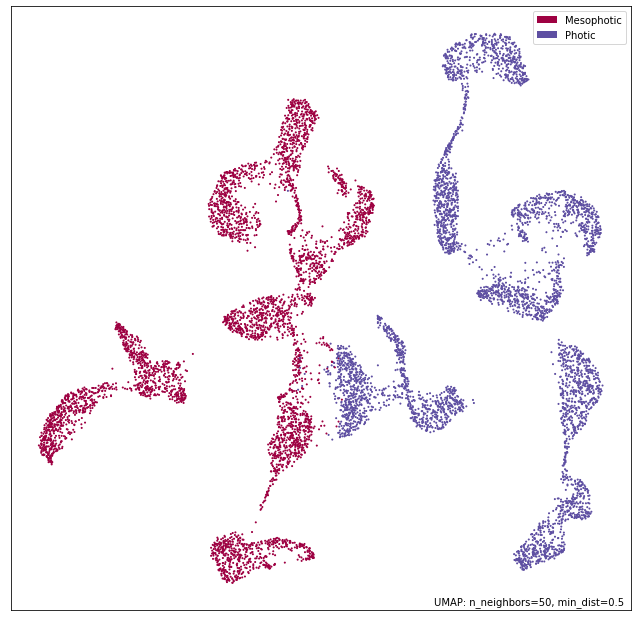

In [ ]:

#import numpy as np
#import matplotlib.pyplot as plt
#from matplotlib import cm
#from matplotlib.colors import ListedColormap
#cmp = ListedColormap(['#FF9912', '#458B74'])

#####create standard plot in viewer 
mapper = umap.UMAP(n_neighbors=50, min_dist=0.5).fit(pretrained_df.iloc[:,2:130]) # may want to change params to .UMAP(n_neighbors=30, min_dist=0.5)

#uses the 'habitat' column as the label
umap.plot.points(mapper, labels=pretrained_df.Habitat)#, theme = 'fire')#color_key_cmap=cmp, background='white')

# **Fully trained split by habitat**

In [ ]:
# Uppload the csv of features and copy the path
fullytrained_path = r'/content/drive/MyDrive/Reef soundscapes with AI/Results/full_dataset_features/trained_CNN_poly.csv'

data = pd.read_csv (fullytrained_path) #load dataframe
temp_df = data.reset_index() #put index in order
temp_df = temp_df.iloc[: , 2:] #remove unnecessary index
temp_df = temp_df.T #transpose to match indices format
temp_df = temp_df.reset_index() #re-add the index
fullytrained_df = temp_df.rename(columns={"index": "minute"})
#pretrained_df

In [ ]:
# Add a column that denotes class
def get_class(filename):
    #find part of the name that corresponds to the deployment
     #adapted the get_identifier function above to only get class (e.g healthy)
    t = filename.split(".")[0][0:5]
    return t

class_type = []
for i in fullytrained_df['minute']:
  class_type.append(get_class(i))
  

fullytrained_df.insert(1, 'Habitat', class_type)

# Check the class column was added 
fullytrained_df.head()



# Rename the renaming sites to High or Low fish
fullytrained_df['Habitat'] = fullytrained_df['Habitat'].replace(['SiteA'],'Photic')
fullytrained_df['Habitat'] = fullytrained_df['Habitat'].replace(['SiteB'],'Photic')
fullytrained_df['Habitat'] = fullytrained_df['Habitat'].replace(['SiteC'],'Photic')
fullytrained_df['Habitat'] = fullytrained_df['Habitat'].replace(['SiteD'],'Photic')

fullytrained_df['Habitat'] = fullytrained_df['Habitat'].replace(['SiteW'],'Mesophotic')
fullytrained_df['Habitat'] = fullytrained_df['Habitat'].replace(['SiteX'],'Mesophotic')
fullytrained_df['Habitat'] = fullytrained_df['Habitat'].replace(['SiteY'],'Mesophotic')
fullytrained_df['Habitat'] = fullytrained_df['Habitat'].replace(['SiteZ'],'Mesophotic')

fullytrained_df.head()

,minute,Habitat,0,1,2,3,4,5,6,7,...,118,119,120,121,122,123,124,125,126,127
0,SiteCDay3.805322778.210303214058.wav,Photic,0.000000,0.000000,12.082821,6.763444,7.179127,0.0,13.351444,20.285992,...,0.0,0.051185,16.882797,0.000000,11.385775,4.218807,0.278274,0.0,0.031203,0.0
1,SiteXDay3.5210.210215103530.wav,Mesophotic,0.247064,0.859065,0.172915,0.105359,4.611157,0.0,0.000000,1.952035,...,0.0,28.823147,17.230404,0.000000,28.133654,0.948916,6.289915,0.0,0.000000,0.0
2,SiteYDay2.5210.210302223537.wav,Mesophotic,8.517760,0.000000,8.564845,6.759220,0.000000,0.0,0.000000,5.992061,...,0.0,14.142094,10.024358,0.000000,0.887872,2.432700,0.000000,0.0,0.000000,0.0
3,SiteDDay2.5210.210317091056.wav,Photic,0.000000,0.642867,10.952372,1.292887,13.916732,0.0,2.824940,0.004537,...,0.0,0.000000,11.003201,15.533544,10.891987,19.481220,0.070055,0.0,0.000000,0.0
4,SiteADay3.805322778.210205190014.wav,Photic,0.000000,7.664385,0.153724,5.604998,0.009447,0.0,9.419145,0.000000,...,0.0,0.000000,0.625055,11.007442,1.294202,7.215663,2.364219,0.0,9.198437,0.0


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  "Graph is not fully connected, spectral embedding may not work as expected."


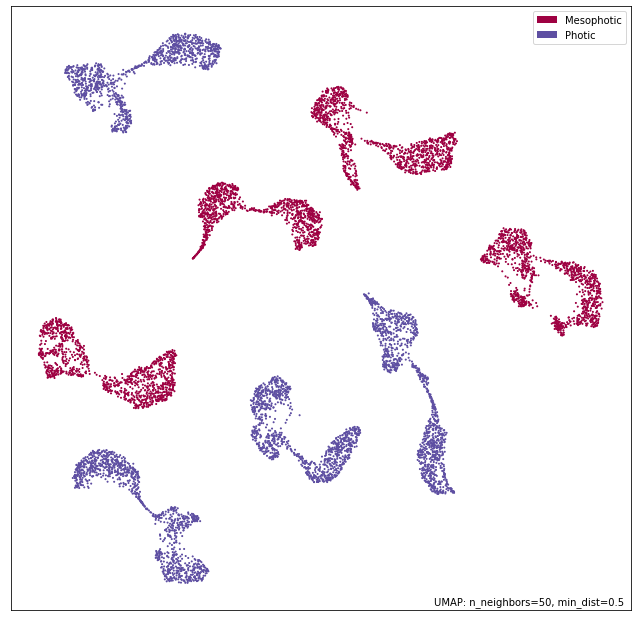

In [ ]:
#####create standard plot in viewer 
mapper = umap.UMAP(n_neighbors=50, min_dist=0.5).fit(fullytrained_df.iloc[:,2:130]) # may want to change params to .UMAP(n_neighbors=30, min_dist=0.5)

#uses the 'habitat' column as the label
umap.plot.points(mapper, labels=fullytrained_df.Habitat)

Attempted interactive plot
Worked, but could not add legend

In [ ]:
os.chdir(r"/content/")

hover_data = pd.DataFrame({'index':np.arange(len(pretrained_df)),
                           'label':pretrained_df.minute[:len(pretrained_df)]})

umap.plot.output_notebook()
umap.plot.output_file('Polynesia_Pretrained_UMAP.html')#choose name of file

#uses the 'habitat' column as the label
p = umap.plot.interactive(mapper, labels=pretrained_df.Habitat, hover_data=hover_data, theme = 'fire',  
                          point_size=3)  ### MAKE POINT SIZE BIGGER TO HOVER MORE EASILY

p.legend.location = "top_left"

show(p)